In [31]:
#Import Librarys
import numpy as np
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy
import math

In [32]:
#Load Image
path = "hand.jpg"
img_o = cv2.imread(path,0)
# print(img.shape)

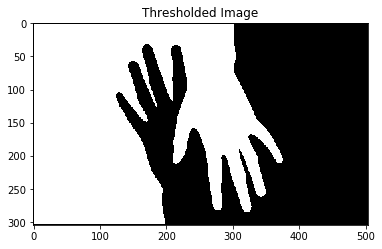

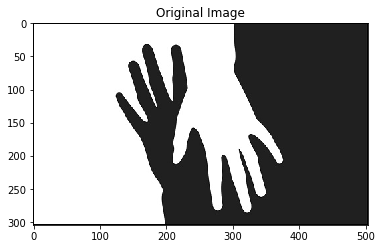

In [33]:
se = np.ones((5,5),np.uint8)
pad = math.floor(se.shape[0]/2)
img = cv2.copyMakeBorder(img_o,pad,pad,pad,pad,cv2.BORDER_CONSTANT,value=0)

_, img_th = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.imshow(img_th,cmap='gray');plt.title('Thresholded Image')
plt.show()
plt.imshow(img,cmap='gray');plt.title('Original Image')
plt.show()

In [34]:
img_th = img_th/255
img_th = img_th.astype(np.uint8)
img_th_1 = deepcopy(img_th)
img_th_2= deepcopy(img_th)
r = img_th.shape[0]
c = img_th.shape[1]

In [47]:
#Erosion
def erosion(img_th, se=se):
    out_e = np.zeros((img_th.shape[0],img_th.shape[1]),np.uint8)
    r = img_th.shape[0]
    c = img_th.shape[1]
    pad = math.floor(se.shape[0]/2)
    for i in range(pad,r-pad):
        for j in range(pad,c-pad):
            if np.all(img_th[i-pad:i+pad+1,j-pad:j+pad+1] == se):
                out_e[i,j] = 1
    return out_e

#Dilation
def dialation(img_th, se=se):
    out_d = np.zeros((img_th.shape[0],img_th.shape[1]),np.uint8)
    pad = math.floor(se.shape[0]/2)
    r = img_th.shape[0]
    c = img_th.shape[1]
    for i in range(pad,r-pad):
        for j in range(pad,c-pad):
            if np.sum(np.multiply(img_th[i-pad:i+pad+1,j-pad:j+pad+1],se)):
                out_d[i,j] = 1
    return out_d

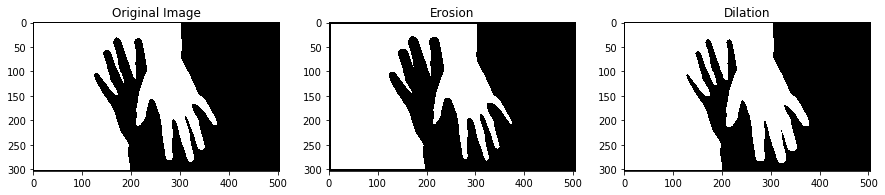

In [36]:
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1,3,1)
plt.imshow(img_th,cmap='gray');plt.title('Original Image')
fig.add_subplot(1,3,2)
plt.imshow(erosion(img_th=img_th_1),cmap='gray');plt.title('Erosion')
fig.add_subplot(1,3,3)
plt.imshow(dialation(img_th=img_th_1),cmap='gray');plt.title('Dilation')
plt.show()

In [37]:
#Closing
def closing(img_th):
    out_e = erosion(img_th=img_th)
    out_o = dialation(img_th=out_e)
    return out_o

#Opening
def opening(img_th):
    out_d = dialation(img_th=img_th)
    out_c = erosion(img_th=out_d)
    return out_c

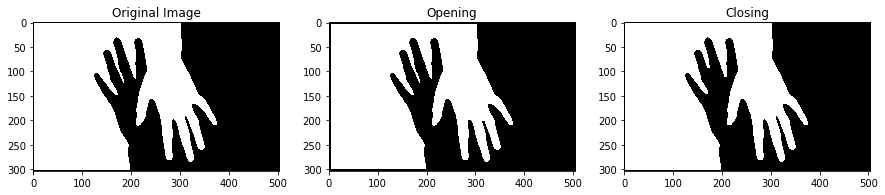

In [38]:
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1,3,1)
plt.imshow(img_th,cmap='gray');plt.title('Original Image')
fig.add_subplot(1,3,2)
plt.imshow(opening(img_th=img_th_2),cmap='gray');plt.title('Opening')
fig.add_subplot(1,3,3)
plt.imshow(closing(img_th=img_th_2),cmap='gray');plt.title('Closing')
plt.show()

In [39]:
#Boundary Exraction
def boundary_extraction(img_th):
    out_be = np.zeros((r,c),np.uint8)
    out_e = erosion(img_th=img_th_1)
    for i in range(0,out_e.shape[0]):
        for j in range(0,out_e.shape[1]):
            if out_e[i,j] != img_th[i,j]:
                out_be[i,j] = 1
            else:
                out_be[i,j] = 0
    return out_be

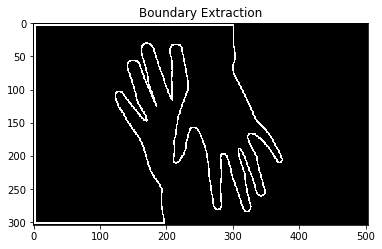

In [40]:
plt.imshow(boundary_extraction(img_th=img_th_1),cmap='gray');plt.title('Boundary Extraction');plt.show()

In [41]:
#Dialation and Erosion in Garyscale Image
def dialation_gray(img_gray):
    out_gray_d = np.zeros((r,c),np.uint8)
    for i in range(pad,r-pad):
        for j in range(pad,c-pad):
            out_gray_d[i,j] = np.max(img_gray[i-pad:i+pad+1,j-pad:j+pad+1])
    return out_gray_d

def ersion_gray(img_gray):
    out_gray_e = np.zeros((r,c),np.uint8)
    for i in range(pad,r-pad):
        for j in range(pad,c-pad):
            out_gray_e[i,j] = np.min(img_gray[i-pad:i+pad+1,j-pad:j+pad+1])
    return out_gray_e

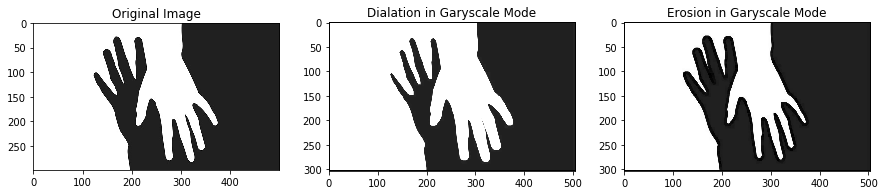

In [42]:
img_gray = deepcopy(img_o)
fig_g = plt.figure(figsize=(15,15))
fig_g.add_subplot(1,3,1)
plt.imshow(img_gray,cmap='gray');plt.title('Original Image')
fig_g.add_subplot(1,3,2)
plt.imshow(dialation_gray(img_gray=img_gray),cmap='gray');plt.title('Dialation in Garyscale Mode')
fig_g.add_subplot(1,3,3)
plt.imshow(ersion_gray(img_gray=img_gray),cmap='gray');plt.title('Erosion in Garyscale Mode')
plt.show()

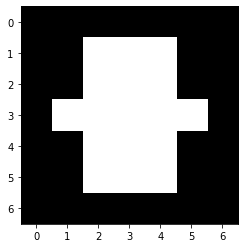

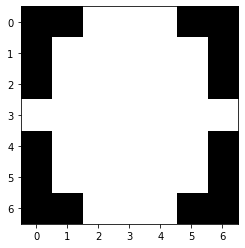

[[  1   1   1   1   1   1   1   1   1]
 [  1   1   1   1   1   1   1   1   1]
 [  1   1   1 255 255 255   1   1   1]
 [  1   1   1 255 255 255   1   1   1]
 [  1   1 255 255 255 255 255   1   1]
 [  1   1   1 255 255 255   1   1   1]
 [  1   1   1 255 255 255   1   1   1]
 [  1   1   1   1   1   1   1   1   1]
 [  1   1   1   1   1   1   1   1   1]]


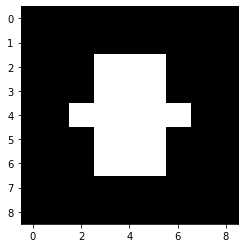

In [67]:
#Hit Or Miss Transformation
k = 7
S= np.zeros((k,k),np.uint8)
S[3, 1:6] = 1
S[1:6, 2:5] = 1
# print(S)
# pad_n = math.floor(k/2) 
plt.imshow(S, "gray");plt.show() 
diamond_se = np.array([[0,1,0],[1,1,1],[0,1,0]])
pad_n = math.floor(diamond_se.shape[0]/2)
S = cv2.copyMakeBorder(S,pad_n,pad_n,pad_n,pad_n,cv2.BORDER_CONSTANT,value=0)
W = dialation(S, se=diamond_se)[1:-1,1:-1]
plt.imshow(W, "gray");plt.show()
# S = S[1:-1,1:-1]
W = 1 - S
W_n = W - S
print(W_n)
plt.imshow(W_n, "gray");plt.show()
# print(W.shape)
# print(W)
def hit_or_miss(img_th_n):
    pass

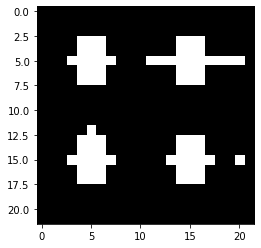

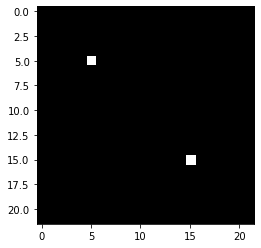

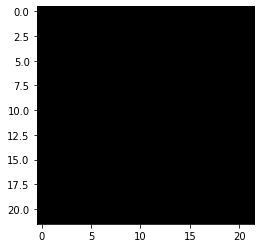

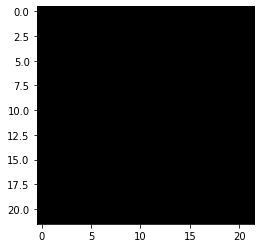

In [61]:
path_n = "hit2.png"
im_n = cv2.imread(path_n,0)
_, thres = cv2.threshold(im_n,127,255,cv2.THRESH_BINARY)
thres= thres/255
plt.imshow(thres, "gray");plt.show()
im_1 = erosion(thres, se=S)
im_2 = erosion((1-thres), se=W_n)
plt.imshow(im_1, "gray");plt.show()
plt.imshow(im_2, "gray");plt.show()

im_3 = np.bitwise_and(im_1, im_2)
plt.imshow(im_3, "gray");plt.show()
